# First steps with the decision trees in Scikit-Learn

**Team Members**

**Member 1: PAJANY - Allan*

**Member 2: SARIGUZEL - Begum*

## 1. Classification with all the features of Iris dataset

Importing machine learning libraries

In [2]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Importing the library to draw the decision tree

In [3]:
# install the package python-graphviz
import graphviz 

Loading the iris dataset

In [4]:
iris = load_iris()
X = iris.data # attributes
y = iris.target # labels

Printing the feature names

In [5]:
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Printing the label names

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Splitting into train and test sets

**Q1: What is the role of the seed?**

In [7]:
# Setting random seed
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = seed )


**Q1 Answer:** Role of the seed is to ensure repeatable results by splitting the exact same observations while running every time.

Learn a decision tree with the iris dataset

**Q2: what is the criterion used to split a node?**

In [8]:
clf = tree.DecisionTreeClassifier()
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


**Q2 Answer:** The 'gini' criteration is chosen by default. It is supposed to give a measure of node impurity.

Training the decision tree

**Q3: Train the decision tree.**

In [9]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Exporting the tree into a pdf file

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

Drawing the decision tree

**Q4: Explain the content presented in each node. What does it mean?**

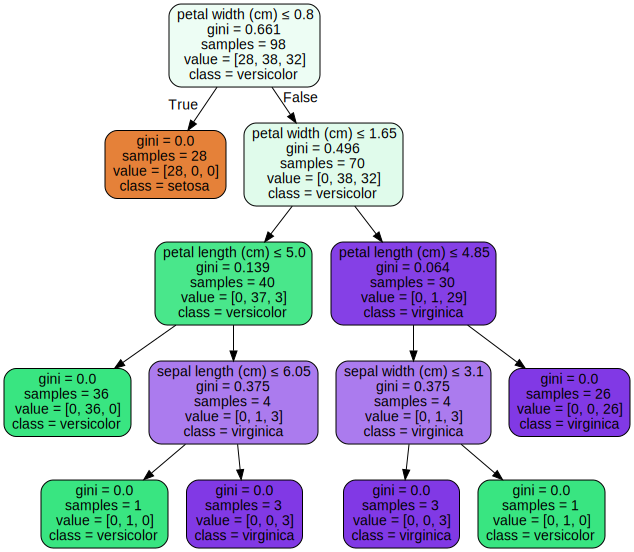

In [11]:
 dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Q4 Answer:** Here, there are different depths and the top most node, at depth of 0, is the root node. We can see division of the data into smaller subsets each time where a question is asked. 
So, the very first question the decision tree asks is the petal length. According to the length (smaller or bigger than 2.45) either false or true path is followed.
Gini gives information about the impurity measure of the node. If it equals to 0, the node is pure otherwise the samples contained within the root node belong to different classes.
Sample value is the iris flower training data set size which contains 98 sample.
The first number in "value" represents the number of samples that belong to the setosa class, the second element of the list shows the number of samples that belong to the versicolor class, and the third element in the list shows the number of samples that belong to the virginica class.
The "class" shows the prediction the node will make and the most within the node will be selected as the class value, it is vercicolor for root node with 38 value.<br>
By the first splitting we obtain one node which contains only iris having petal length <= 2.45. We know that from 0 gini value this node includes only the setosa type iris.<br>
For the second split, the threshold (<=1.65) with the petal width is used. It leads to two nodes with low degree of impurity (0.139 and 0.064). They contain only virginica and versicolor classes.<br>
For the next splitting, petal length is considered again, this time with different thresholds. This results two nodes with 0 degree of impurity. Then we have only 8 samples to classify (determine whether they are virginica or versicolor). <br>
Last splitting considers sepal length and sepal width to differentiate 1 virginica from 3 versicolor. And finally we have only leaves with 0 gini values.

Computing the accuracy on the training set and the testing set

**Q5: Compute the accuracy on the training dataset and the test dataset?.**

In [12]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('DecisionTreeClassifier training accuracy score: {}'.format(accuracy_train))
print('DecisionTreeClassifier test accuracy score: {}'.format(accuracy_test))

DecisionTreeClassifier training accuracy score: 1.0
DecisionTreeClassifier test accuracy score: 0.9615384615384616


**Q6: We observe a gap between the training accuracy and the testing accuracy. What does it mean? Propose a simple modification of the code to reduce this gap.**

**Q6 Answer:** The gap between the training accuracy and the testing accurancy is related to the train and test split percentage. When we give big amount (relatively) of different data to test it is expected to have this kind of gap. When we decrease the test size to 10% it gives equal accuracies. 

In [13]:
seed = 100
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.10, random_state = seed )
clf1 = tree.DecisionTreeClassifier()
clf1.fit(X_train1,y_train1)
y_pred_test1 = clf1.predict(X_test1)
y_pred_train1 = clf1.predict(X_train1)
accuracy_test1 = accuracy_score(y_test1, y_pred_test1)
accuracy_train1 = accuracy_score(y_train1, y_pred_train1)
print('DecisionTreeClassifier training accuracy score: {}'.format(accuracy_train1))
print('DecisionTreeClassifier test accuracy score: {}'.format(accuracy_test1))


DecisionTreeClassifier training accuracy score: 1.0
DecisionTreeClassifier test accuracy score: 1.0


## 2. Classification with only two features of Iris dataset

**We would like to understand more precisely the behavior of the decision tree.
For this purpose, we want to study the decision regions learned by the decision tree.
Since it is simpler in 2D, we will study only 2 attributes.**

Import some libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Study just one pair of attributes

**Q7: Select only the two attributes 'sepal length (cm)' and 'petal width (cm)'**

In [15]:
# Complter the cell. You msut respect what is already written.
import numpy as np

pair = [0,3]

X_train2D = X_train[:,pair]
X_test2D = X_test[:,pair]

**Q8: Train the decision tree on the reduced dataset.**

In [16]:
clf2D = tree.DecisionTreeClassifier()
clf2D.fit(X_train2D,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Compute the accuracies for only two attributes

**Q9: Compute the training and testing accuracies.**

In [17]:
y_pred_test2D = clf2D.predict(X_test2D)
y_pred_train2D = clf2D.predict(X_train2D)
accuracy_test2D = accuracy_score(y_test, y_pred_test2D)
accuracy_train2D = accuracy_score(y_train, y_pred_train2D)
print('DecisionTreeClassifier training accuracy score: {}'.format(accuracy_train2D))
print('DecisionTreeClassifier test accuracy score: {}'.format(accuracy_test2D))

DecisionTreeClassifier training accuracy score: 0.9795918367346939
DecisionTreeClassifier test accuracy score: 0.9423076923076923


Plot the decision regions

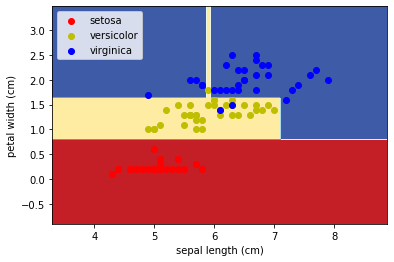

In [18]:
# Parameters
plot_step = 0.02
n_classes = iris.target_names.shape[0]
plot_colors = "ryb" # colors assigned to the labels

# Sampling the 2D plane
x_min, x_max = X_train2D[:, 0].min() - 1, X_train2D[:, 0].max() + 1
y_min, y_max = X_train2D[:, 1].min() - 1, X_train2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))

# Compute the decisions
Z = clf2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) # reshape as a 2D matrix

# Plot the decision contours
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Change the axis names
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
plt.axis()
 
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(X_train2D[idx, 0], X_train2D[idx, 1], c=color,
                 label=iris.target_names[i],
                 cmap=plt.cm.RdYlBu)
# Put a legend
plt.legend(loc="upper left")
plt.show()

Attention: plot_colors value is changed with "ryb" which gives a better result.

Draw the decision tree

**Q10: draw the decision tree with graphviz. Is it consistent with the decision regions plot above?**

**Q10 Answer:** This tree has 5 more depths than the previous one. Having less feautures (2 exactly) costs more splitting operation.

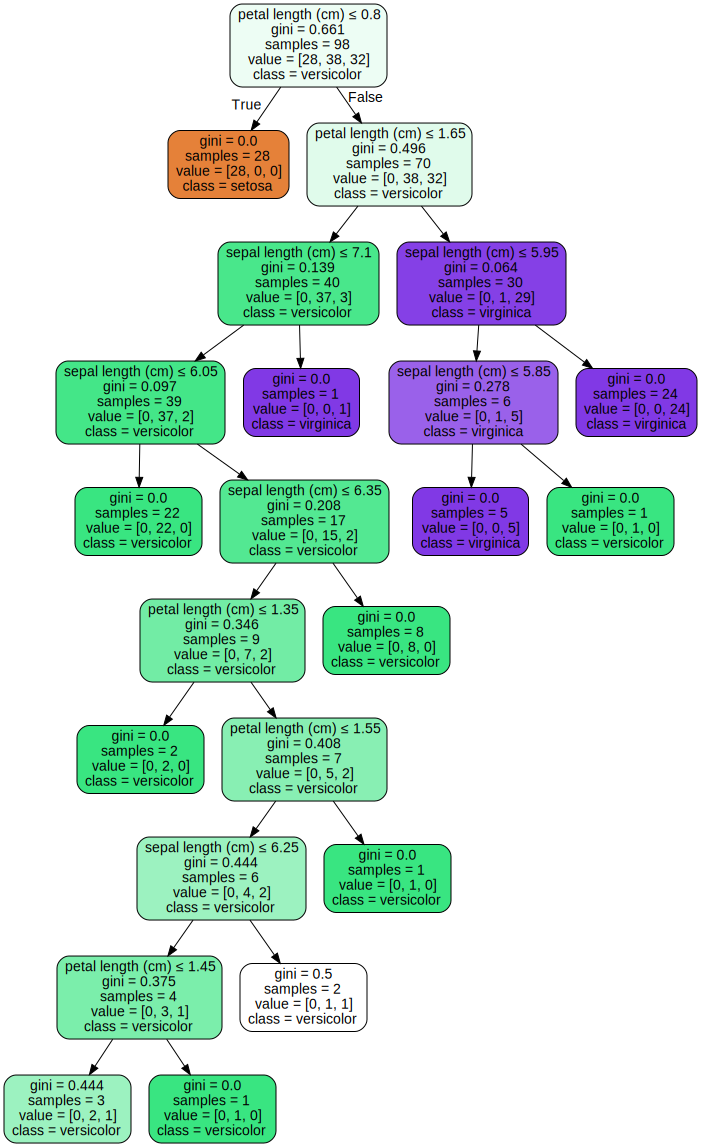

In [19]:
features = [iris.feature_names[0], iris.feature_names[2]]
dot_data2D = tree.export_graphviz(clf2D, out_file=None, 
                         feature_names=features,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data2D)  
graph

## 3. Selection of a classification model with all the features

**Q11: Evaluate the accuracy of the classification with a cross-validation.**

**Use a 10-fold cross-validation to assess your decision tree.**

**Print the mean accuracy over the 10 folds and its standard-deviation.**

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print("Mean accuracy over 10 folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Mean accuracy over 10 folds: 0.96 (+/- 0.09)


**Q12: Use a grid search to test all possible values max_depth (from 1 to 8) of a tree classifier.**

**For each search, you will use a 5-fold cross-validation.**

**The score will be the accuracy.**

In [21]:
from sklearn.model_selection import GridSearchCV

clf_model=tree.DecisionTreeClassifier()
grid_parameters = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 8)}
clf_gscv = GridSearchCV(estimator=clf_model,
                     param_grid=grid_parameters,
                     scoring='accuracy',
                     cv=5,
                    return_train_score=True)
print(clf_gscv.fit(X_train, y_train))


best_result = clf_gscv.best_score_
print("Mean cross-validated score of the best_estimator: ",best_result)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7])},
        

C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The accuracy achieved is 97% which is only slightly better than 96%. 

**Q13: print the mean scores of all the tested models.**

In [22]:
clf_gscv.cv_results_['mean_test_score']

array([0.67346939, 0.95918367, 0.96938776, 0.96938776, 0.96938776,
       0.96938776, 0.97959184, 0.67346939, 0.95918367, 0.97959184,
       0.95918367, 0.96938776, 0.94897959, 0.95918367])

**Q14: print the standard-deviation of the score of all the tested models.**

In [23]:
clf_gscv.cv_results_['std_test_score']

array([0.0134343 , 0.03568998, 0.03863203, 0.02334335, 0.02334335,
       0.02334335, 0.02356532, 0.0134343 , 0.03568998, 0.02356532,
       0.03669688, 0.03863203, 0.04321201, 0.03568998])

**Q15: print the parameter of the best model.**

In [24]:
clf_gscv.best_params_

{'criterion': 'gini', 'max_depth': 7}